
#  Project Phase 2
##  Estimating the Risk of Heart Disease


# 1. Introduction


Heart disease is one of the leading cause of death and it generally refers to conditions that involve narrowed or blocked blood vessels that can led to a heart attack, chest pain or stroke. Since this has been a major concering problems in healthcare, having the ability to predict a heart disease can provide important insights to doctors who can adapt their diagnosis and treatment per patient basis. These predictions are now possible with the help of enormous medical data and machine learning algorithms.


## 1.1  Abstract
The objective of this project is to predict whether a person has a cardiovascular disease.The dataset was obtained from the kaggle website at https://www.kaggle.com/ronitf/heart-disease-uci [1]. This project has been divided into two phases. 
Phase-1 is focused in data pre-processing and data exploration.
Phase-2 is focused on Model-building and Model Evaluation as presented in this project. 

The phase -  2 of the project involves the following content:
- [(Data Preparation)](#3) summarizes the data preparation process and our model evaluation strategy. 
- [ (Hyperparameter Tuning)](#4) describes the hyperparameter tuning process for each classification algorithm.
- [ (Performance Comparison)](#5) presents model performance comparison results.
- [(Limitations)](#6) discusses a limitations of our approach and possible solutions. 
- [(Summary)](#7) provides a brief summary of our work in this project.





## 1.2 Methodology

We take into consideration binary classifiers to predict the targer feature:
* K-Nearest Neighbors (KNN)
* Naive Bayes (NB)
* Decision trees (DT)

A completely cleaned dataset preprocessed in Phase-1 was used for modeling. We start our Data-modeling stage by transforming the full dataset by encoding the categorical descriptive dataset and scaling the descriptive features. Under- sampling is done to level the levels oif the target feature. A split ratio  of 70:30 was taken into consideration which divided the dataset into 194 training set  and 84 testing set.

We then move on to feature selection method by random forest classifier to select the best features for our model. Then modelling is performed with best tuned hyper parameters for each classifiers using the area under curve method and the performance metric. We also examine sensitivity of each model with respect to its hyperparameters during the search.


The best model is then identified from the three classifiers after model evaluation and then 10 fold cross validation on the test data is performed followed by a paried t-test to see if any performance difference is statistically significant. In addition we compare their recall scores and confusion matrices on the test data.

## 1.3 Data Sets
The UCI Machine learning repository is the parent source of the kaggle database and it consist of 4 database namely, Cleveland, Hungary Switzerland and the VA Long Beach. As the  Cleveland dataset was set as a benchmark by many researchers, we perform our analysis with the following  dataset.
The dataset consist of 14 attributes including the target variable and 303 patient observations. The attributes present categorical, integer and real characteristics. 
### 1.3.1 Target Feature
The response feature named 'Target'is the angiographic disease status and is actually designated as diameter narrowing in any major vessel. However for this project we consider whether a person is diagonised with a heart disease or not as the target feature. 
The target feature has two classes and hence it is a binary classsification problem. To reiterate, the goal is to predict whether a patient has heart disease.

### 1.3.2 Descriptive Features

The 13 descriptive features provided by the experts in the field include:

    Age: Age of the patient 
    Gender: Sex of the patient (2 levels- Male, Female)
    Chest Pain: 
       Type 1:typical angina
       Type 2:atypical angina 
       Type 3:non-anginal pain 
       Type 4:asymptomatic
    Trestbps: Resting blood pressure-in mm Hg on admission to the hospital
    Cholestoral: Serum cholesterol in mg/dl 
    FBS: Fasting blood sugar > 120 mg/dl (Categorical with 2 levels-True,False)
        1: true
        0: false
    Restecg: Resting electrocardiographic results
        0: normal 
        1: ST-T wave abnormality
        2: left ventricular hypertrophy
    Maximum Heart Rate: Maximum heart rate achieved 
    Exang: Exercise induced angina (2 levels-Yes, No)
        1: yes
        0: no
    Oldpeak: ST depression induced by exercise relative to rest 
    Slope: The slope of the peak exercise ST segment (3 levels-Up, Flat, Down, Up)
        1: upsloping
        2: flat 
        3: downsloping
    Ca: Number of major vessels (0-3) colored by flourosopy (4 levels - 0, 1, 2, 3)
    Thal: The heart status as retrieved from Thallium test (3 levels-N(normal),FD(fixed defect), RD(reversible defect))
        3: normal
        6: fixed defect
        7: reversable defect
    Target: diagnosis of heart disease(angiographic disease status):
        0: No disease 
        1-4: Disease

# 2. Data Pre-processing <a class="anchor" id="3"></a>

## 2.1 Packages 
We start by loading all revelant packages necessary for our analysis.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings 
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

/Users/noobtechsquad/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 2.2 Importing Dataset
We import the raw dataset into the our Jupyter workspace. As our source file is of the type csv, we use the read csv function in pandas to help us with the importation and store it to a variable name Heart. We provide relevant headers to the dataset as provided by the experts to get better insights on the data.
We then use the shape and head function to check whether the loaded dataset is equivalent to the data in the source CSV file. The datatypes of the variables were also observed for further awareness of the dataset.


In [4]:
# Load the data from the file
Heart = pd.read_csv('processed.cleveland.csv', sep = ',', decimal = '.')

# change column name
Heart.columns =['Age', 'Gender', 'ChestPain', 'Trestbps', 'Cholestoral',
                'FBS', 'Restecg','MaximumHeartRate','Exang', 'OldPeak', 
                'Slope','Ca', 'Thal', 'Target']
Heart['Target'] = Heart['Target'].mask(Heart['Target']>1, 1)

Heart.dtypes
Heart.shape
Heart.head(10)
Heart.columns.values

Age                   int64
Gender                int64
ChestPain             int64
Trestbps              int64
Cholestoral           int64
FBS                   int64
Restecg               int64
MaximumHeartRate      int64
Exang                 int64
OldPeak             float64
Slope                 int64
Ca                    int64
Thal                  int64
Target                int64
dtype: object

(302, 14)

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal,Target
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
6,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
8,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


array(['Age', 'Gender', 'ChestPain', 'Trestbps', 'Cholestoral', 'FBS',
       'Restecg', 'MaximumHeartRate', 'Exang', 'OldPeak', 'Slope', 'Ca',
       'Thal', 'Target'], dtype=object)

In [4]:
Heart.isna().sum()

Age                 0
Gender              0
ChestPain           0
Trestbps            0
Cholestoral         0
FBS                 0
Restecg             0
MaximumHeartRate    0
Exang               0
OldPeak             0
Slope               0
Ca                  0
Thal                0
Target              0
dtype: int64

In [76]:
Heart.describe()

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal,Target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.682119,4.728477,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.946200,1.939051,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
Heart.sample(n=5, random_state=999)

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal,Target
134,55,0,2,135,250,0,2,161,0,1.4,2,0,3,0
27,43,1,4,150,247,0,0,171,0,1.5,1,0,3,0
188,69,1,3,140,254,0,2,146,0,2.0,2,3,7,1
107,61,1,4,120,260,0,0,140,1,3.6,2,1,7,1
96,60,0,4,150,258,0,2,157,0,2.6,2,2,7,1


0    163
1    139
Name: Target, dtype: int64

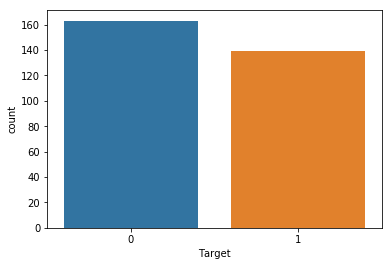

In [77]:
sns.countplot(Heart['Target'])
Heart['Target'].value_counts()

From the above plot, we observe an imbalance dataset, hence, undersampling is done to balance the ratio.
UnderSampling is the process where you randomly delete some of the observation from the majority class in order to match the numbers with the minority class. 

1    139
0    139
Name: Target, dtype: int64

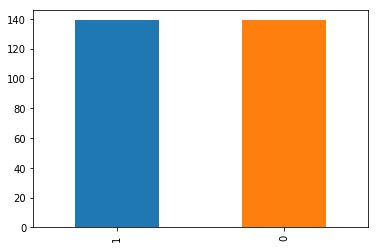

In [78]:
# Undersampling
count_class_0, count_class_1 = Heart['Target'].value_counts()

Heart_0 = Heart[Heart['Target'] ==0]
Heart_1 = Heart[Heart['Target'] ==1]

Heart_NoDisease = Heart_0.sample(count_class_1)
Heart_Disease = Heart_1.sample(count_class_1)

HeartBalance = pd.concat([Heart_NoDisease, Heart_Disease ], axis = 0)
HeartBalance['Target'].value_counts().plot(kind ='bar')

HeartBalance['Target'].value_counts()

<Figure size 936x504 with 0 Axes>

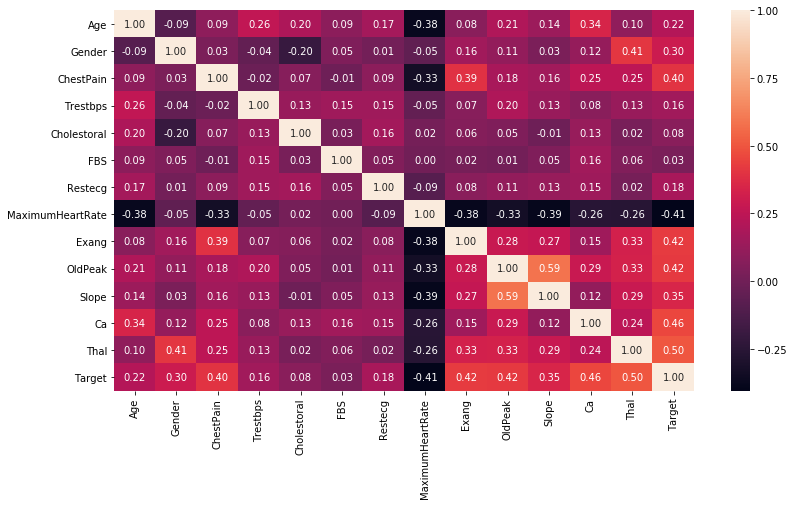

In [79]:
plt.figure(figsize=(13,7))
sns.heatmap(HeartBalance.corr(), annot=True, fmt=".2f")
# sns.heatmap(HeartBalance.corr())

# Encoding The Target Feature

(278, 13)

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal
218,59,1,4,138,271,0,2,182,0,0.0,1,0,3
254,42,0,3,120,209,0,0,173,0,0.0,2,0,3
189,50,1,3,129,196,0,0,163,0,0.0,1,0,3
76,51,0,3,140,308,0,2,142,0,1.5,1,1,3
165,52,1,3,138,223,0,0,169,0,0.0,1,2,3


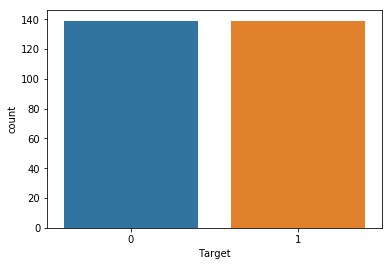

In [80]:
Target = HeartBalance['Target']
Data = HeartBalance.drop(columns = "Target")
sns.countplot(Target)
Data.shape
Data.head(5)

# Scaling of Features

After undersampling and encoding of target feature we move on to the feature scaling where we perform a min-max scaling method to  balance the scale of our features from 0 to 1. We start this by first keeping a copy of the data to keep track of the columns.

In [81]:
from sklearn import preprocessing
Heart_df = Data.copy()

Heart_scaler = preprocessing.MinMaxScaler()
Heart_scaler.fit(Data)
Data = Heart_scaler.fit_transform(Data)

MinMaxScaler(copy=True, feature_range=(0, 1))

Let's have another look at the descriptive features after scaling. Pay attention that the output of the scaler is a `NumPy` array, so all the column names are lost. That's why we kept a copy of Data before scaling so that we can recover the column names below. We observe below that binary features are still kept as binary after the min-max scaling.

In [82]:
pd.DataFrame(Data, columns = Heart_df.columns).sample(10, random_state = 999)

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal
186,0.583333,1.0,1.000000,0.339623,0.000000,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
26,0.375000,1.0,1.000000,0.169811,0.168591,0.0,0.0,0.549618,0.0,0.016129,0.0,0.000000,0.00
153,0.687500,1.0,0.333333,0.245283,0.346420,0.0,1.0,0.244275,0.0,0.225806,0.5,0.333333,1.00
259,0.666667,0.0,1.000000,0.339623,0.459584,0.0,1.0,0.748092,0.0,0.000000,0.0,0.000000,0.00
8,0.666667,1.0,0.666667,0.528302,0.258661,1.0,0.0,0.503817,1.0,0.161290,0.5,0.000000,0.00
181,0.583333,1.0,1.000000,0.528302,0.334873,0.0,1.0,0.312977,1.0,0.096774,0.5,0.333333,0.75
230,0.645833,1.0,1.000000,0.292453,0.293303,0.0,1.0,0.534351,1.0,0.451613,0.5,0.333333,1.00
227,0.833333,1.0,0.666667,0.433962,0.284065,0.0,1.0,0.572519,0.0,0.322581,0.5,1.000000,1.00
0,0.625000,1.0,1.000000,0.415094,0.323326,0.0,1.0,0.847328,0.0,0.000000,0.0,0.000000,0.00
232,0.708333,1.0,1.000000,0.339623,0.284065,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,1.00


# Feature Selection & Ranking

In the above correlation matrix we already saw which features gave strong postitive and strong negative correaltion. However to give us a more discrete and important fetures necessary for modeling we use the random forest classifier to give us the 10 most significant features. Later, in the process of hyperparameter tuning we include the random forest importance in the pipeline to determine which features works best with each classifier.

In [83]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_RFI = RandomForestClassifier(n_estimators = 100)
model_RFI.fit(Data, Target)
fs_indices_rfi = np.argsort(model_RFI.feature_importances_)[::-1][0:num_features]

best_features_rfi = Heart_df.columns[fs_indices_rfi].values
best_features_rfi

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

array(['ChestPain', 'MaximumHeartRate', 'Ca', 'Thal', 'OldPeak', 'Age',
       'Cholestoral', 'Trestbps', 'Exang', 'Slope'], dtype=object)

In [14]:
feature_importances_rfi = model_RFI.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.1613499 , 0.13249946, 0.10752894, 0.09910132, 0.09650837,
       0.09056245, 0.07588016, 0.07522741, 0.04985324, 0.04972272])

 Visulization of these importance: 

In [84]:
import altair as alt
alt.renderers.enable('notebook')
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features' : best_features,
                      'importances' : scores})
    
    chart = alt.Chart(df, 
                     width = 500,
                     title = method_name + 'Feature Importances'
                     ).mark_bar(opacity = 0.85,
                               color = color).encode(
    alt.X('features', title = 'Feature', sort=None, axis = alt.AxisConfig(labelAngle=45)),
    alt.Y('importances', title = 'Importance'))
    
    return chart

RendererRegistry.enable('notebook')

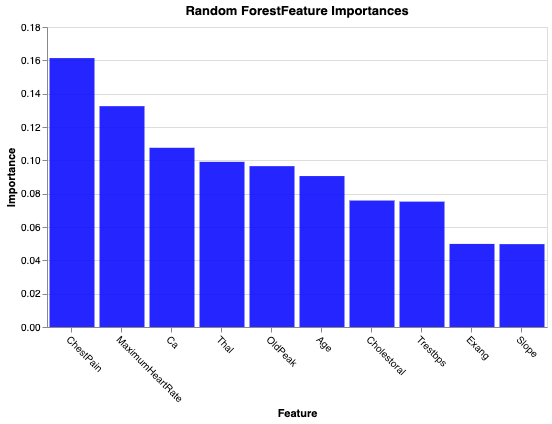

In [85]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

Chest Pain which was strongly correlated as seen previously in the scatter matrix has been graded as the most significant feature of importance by the random forest importance. It is then followed by  Maximum Heart Rate and ca.



# Data sampling & Train-Test splitting

The original dataset consist of 302 observations, however after applying undersampling method to level both levels of target feature the number of observations taken into consideration for modeling is 278 observations. The train-test split taken into the process was in the ratio 70:30 where 194 observations were used for training and the rest 84 observations were used to test the model.



In [86]:
Data_sample = pd.DataFrame(Data, columns = Heart_df.columns).values
Target_sample = pd.DataFrame(Target).values

X_train, X_test, y_train, y_test = train_test_split(Data_sample, Target_sample, test_size = 0.3, random_state = 999,
                                                   stratify = Target_sample)
#X_train.head()
X_train.shape
#X_test.head()
X_test.shape

(194, 13)

(84, 13)

# Model Evaluation Strategy
For each model, we will use 5-fold stratified cross-validation evaluation method (without any repetitions for shorter run times) for hyperparameter tuning.

In [87]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv_method = StratifiedKFold(n_splits = 5, random_state = 999)

# Hyperparameter Tuning  <a class="anchor" id="4"></a> 

## K-Nearest Neighbor(KNN)

A hyperparameter is a parameter whose value is set before the learning process begins. Hyperparameter tuning is choosing a set of optimal hyperparameter for a learning algorithm. In the case of K, we use the cross-validation technique to get the best value of `K` and distance metric `p` for the model. In the cross validation model the loop repeats over different K and gives us the accuracy of the best K. 

We also use the Random Forest Importance(RFI) method by defining a custom `RFQFeatureSelector()` class as seen below in RFI as a step to the pipeline.



In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': range(1,30),
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [90]:
gs_pipe_KNN.fit(X_train, y_train);

Fitting 5 folds for each of 174 candidates, totalling 870 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  52 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-2)]: Done 352 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-2)]: Done 852 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-2)]: Done 870 out of 870 | elapsed:   31.0s finished


In [91]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 22, 'knn__p': 1, 'rfi_fs__n_features_': 10}

In [92]:
gs_pipe_KNN.best_score_

0.9011394465545307

The optimal or ideal values for KNN model include 22 nearest neighbours and p = 1. The mean AUC score of 0.90 was observed from the optimal KNN model.

In [93]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [94]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
126,0.901058,0.027847,0.943750,0.86625,22.0,1.0,10.0
120,0.899936,0.032795,0.942500,0.84250,21.0,1.0,10.0
132,0.896916,0.031491,0.940000,0.84375,23.0,1.0,10.0
138,0.895727,0.028513,0.937500,0.85000,24.0,1.0,10.0
78,0.895659,0.016358,0.916898,0.86750,14.0,1.0,10.0


As observed above we see that there is very less difference between hyperparameter combination when conditioned on a number of features selected. Lets visualize the results on the grid search corresponding to 10 selected features.

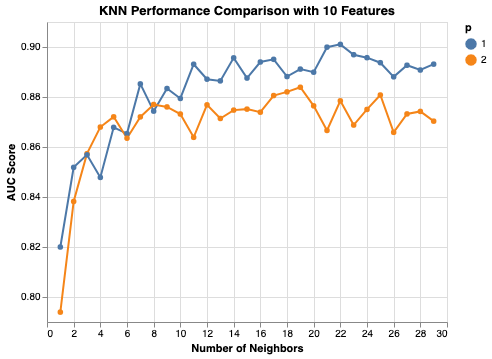

In [95]:
import altair as alt

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

## (Gaussian) Naive Bayes (NB)
Naive Bayes classifier are a family of simple probabilistic classifiers with strong independence assumption between features.
We implement this model by optimizing the variant of laplace smoothing. Since NB requires each descriptive feature to follow a Gasussian distribution, we first perform a power transformation on the input data before model fitting.

In [96]:
from sklearn.preprocessing import PowerTransformer
X_train_transformed = PowerTransformer().fit_transform(X_train)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 30
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(X_train_transformed, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:    5.1s finished


In [98]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 20, 'nb__var_smoothing': 8.703591361485161}

In [99]:
gs_pipe_NB.best_score_

0.894384156266956

The optimal NB yields an AUC score of 0.896 with 10 features which is less compared to KNN.However,  We perform a paried t test  later to compare the performance of model.

In [100]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
28,0.894450,0.026817,0.9325,0.85,20.0,8.703591
17,0.893950,0.026117,0.9300,0.85,20.0,6.905514
11,0.893896,0.027456,0.9325,0.85,13.0,1.570290
20,0.893896,0.027456,0.9325,0.85,13.0,1.644676
14,0.893342,0.027237,0.9325,0.85,20.0,1.889652


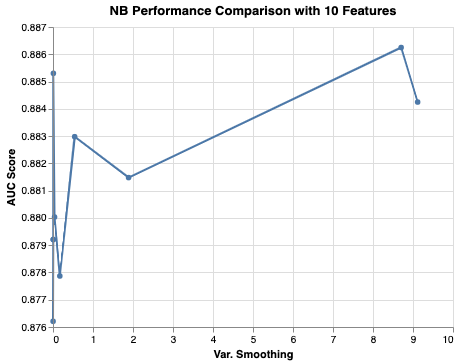

In [101]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

## Decision Tree(DT)

Decision tree another important supervised learning algorithm which splits the population or sample into two or more homogenous sets.
We build a decision tree using gini index or entropy as the split criterion to maximize information gain and homogenity. We also aim to determine the optimal parameters for the decsion tree such as maximum depth and minimum sample split.


In [133]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# df_classifier = DecisionTreeClassifier(random_state=999)

# pipe_DT = Pipeline([('fselector', SelectKBest(score_func=f_classif)),
#                     ('dt', df_classifier)])

# params_pipe_DT = {'fselector__k': [3],
#                   'dt__criterion':['gini', 'entropy'],
#                   'dt__max_depth': range(3,10),
#                   'dt__min_samples_split': range(2,5)}

# gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
#                           param_grid=params_pipe_DT, 
#                           cv=cv_method,
#                           refit='accuracy',
#                           n_jobs=-2,
#                           scoring='accuracy',
#                           verbose=1) 

from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(random_state = 999))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__criterion' : ['gini', 'entropy'],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  54 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:    8.5s finished


In [134]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 3,
 'dt__min_samples_split': 2,
 'rfi_fs__n_features_': 20}

In [135]:
gs_pipe_DT.best_score_

0.8131036353771025

The best DT has  a maximum depth of 3 and a min sample split value of 2 samples with an AUC score of 0.8599.

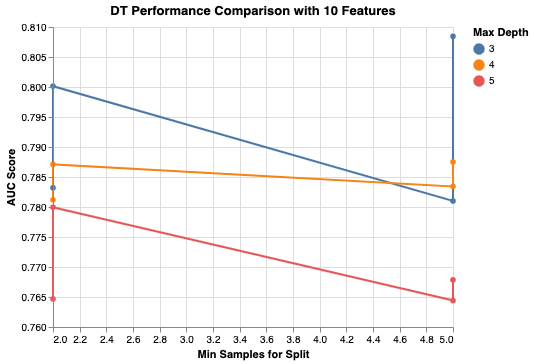

In [136]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

## Further Fine Tuning

In [137]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                   'dt__criterion' : ['gini', 'entropy'],
                  'dt__max_depth': range(10, 20),
                  'dt__min_samples_split': [5, 50, 100, 150, 200]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-2)]: Done 382 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:   15.8s finished


In [138]:
gs_pipe_DT2.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 10,
 'dt__min_samples_split': 50,
 'rfi_fs__n_features_': 10}

In [139]:
gs_pipe_DT2.best_score_

0.8147721106890939

As expected above we see that the scores have improved after the further tuning the model. We also see better results below in the new search space.

In [140]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
81,0.815412,0.0436776,0.844875,0.72875,entropy,16,50,10
51,0.815412,0.0436776,0.844875,0.72875,entropy,10,50,10
76,0.815412,0.0436776,0.844875,0.72875,entropy,15,50,10
56,0.815412,0.0436776,0.844875,0.72875,entropy,11,50,10
41,0.813277,0.044833,0.844875,0.725,gini,18,50,10


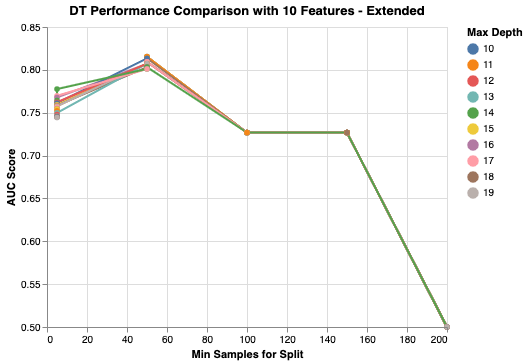

In [141]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

# Performance Comparison <a class="anchor" id="5"></a>

We have optimized each one of the three classifiers using the training data. We now fit the optimized models on the test data in a cross-validated. And then applied the two-sided test for the null hypothesis that 2 related sample have identical average (expected) values. 
* KNN vs. NB,
* KNN vs. DT, and
* DT vs. NB.

In [117]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8699999999999999

In [118]:
X_test_transformed = PowerTransformer().fit_transform(X_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=X_test_transformed,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.9175000000000001

In [119]:
# For the decision tree, use bestScore() function to determined the best parameter.
def bestScore():
    if (gs_pipe_DT2.best_score_ > gs_pipe_DT.best_score_):
        return gs_pipe_DT2
    else: 
        return gs_pipe_DT

In [120]:
cv_results_DT = cross_val_score(estimator=bestScore().best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.792625

Since we fixed the same random state to be same during cross-validation, all classifiers were fitted and then tested on exactly the same test data partitions.  Applied two-sided test 'stats.ttest_rel' function from the SciPy module to run the test data.  If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

In [122]:
from scipy import stats

stat, p = stats.ttest_rel(cv_results_KNN, cv_results_NB)
print('T test Rel_Result for KNN and NB: Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Identical average scores (fail to reject H0)')
else:
    print('Equal averages (reject H0)')


T test Rel_Result for KNN and NB: Statistics=-2.396, p=0.040
Equal averages (reject H0)


In [123]:
stat, p = stats.ttest_rel(cv_results_DT, cv_results_KNN)
print('T test Rel_Result for DT and KNN: Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Identical average scores (fail to reject H0)')
else:
    print('Equal averages (reject H0)')

T test Rel_Result for DT and KNN: Statistics=-1.450, p=0.181
Identical average scores (fail to reject H0)


In [124]:
stat, p = stats.ttest_rel(cv_results_DT, cv_results_NB)
print('T test Rel_Result for DT and NB: Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Identical average scores (fail to reject H0)')
else:
    print('Equal averages (reject H0)')

T test Rel_Result for DT and NB: Statistics=-2.061, p=0.069
Identical average scores (fail to reject H0)


From T test Rel_Result, the best model is NB. A p-value smaller than 0.05 indicates a statistically significant difference. Looking at these results, we conclude that at a 95% significance level, NB is statistically the best model in this competition (in terms of AUC) when compared on the test data.

Consider the following metrics to evaluate models based on the test set:
 * Accuracy
 * Precision
 * Recall
 * F1 score
 * Confusion Matrix

In [126]:
pred_KNN = gs_pipe_KNN.predict(X_test)

In [127]:
Data_test_transformed = PowerTransformer().fit_transform(X_test)
pred_NB = gs_pipe_NB.predict(X_test_transformed)

In [128]:
pred_DT = bestScore().predict(X_test)

In [129]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.83      0.81      0.82        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.90      0.83      0.86        42

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.80      0.79      0.80        42

    accuracy                           0.80        84
  

In [130]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(y_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[35  7]
 [ 8 34]]

Confusion matrix for Naive Bayes
[[38  4]
 [ 7 35]]

Confusion matrix for Decision Tree
[[34  8]
 [ 9 33]]


In [132]:
# classification error
print("Accuracy of KNN: ", metrics.accuracy_score(y_test, pred_KNN))
print("Classification Error of KNN: ", 1 - metrics.accuracy_score(y_test, pred_KNN))

print ("\n")

print("Accuracy of Naive Bayes: ", metrics.accuracy_score(y_test, pred_NB))
print("Classification Error of Naive Bayes: ", 1 - metrics.accuracy_score(y_test, pred_NB))

print ("\n" )   
      
print("Accuracy of Decision Tree: ", metrics.accuracy_score(y_test, pred_DT))
print("Classification Error of Decision Tree: ", 1 - metrics.accuracy_score(y_test, pred_DT))

Accuracy of KNN:  0.8214285714285714
Classification Error of KNN:  0.1785714285714286


Accuracy of Naive Bayes:  0.8690476190476191
Classification Error of Naive Bayes:  0.13095238095238093


Accuracy of Decision Tree:  0.7976190476190477
Classification Error of Decision Tree:  0.20238095238095233


In the case of heart disease we know that accuracy and precision as the performance metric as it more about getting the right prediction. In this case NB would be the best model as it has the highest precision and accuracy and the least classification error rate. The confusion matrix is also in line with the classification report and the statistical report. 

# Limitations and Proposed Solutions <a class="anchor" id="6"></a> 

Our modeling strategy has a few flaws and limitations.
First,In this project as we have only limited ourselves with three algorithms for supervised classification problem to find the best model for the prediction. 

Second, the dataset that we used for the study had very limited number of observation which is a setback as data is alwyas valuable, in the future we can run the analysis with more precision by involving more observation and rerunning our experiments.

Lastly,the black-box approach involving raw predictive power over interpretation. In the future we can consider even more in-depth analysis with better domain knowladgefor choices of hyperpa 


# References  <a class="anchor" id="7"></a>

1. Case Study provided by  Dr. Virul and team
2.  https://www.kaggle.com/ronitf/heart-disease-uci [1]
3. https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624
4. https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes